# DATA EXPLORATION

We will explore the data to detect `fake users`.

# 1. Loading packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. Data analysis

In [2]:
# Loading the file to use for training a futur model
df = pd.read_csv('../data/fake_users.csv')

In [3]:
df.head(2)

,Unnamed: 0,UserId,Event,Category,Fake
0,0,F7A7BF3761,click_carrousel,Phone,0
1,1,BA8F7A71E6,send_sms,Motor,0


In [4]:
df.shape

(100473, 5)

In [5]:
df.UserId.nunique()
df.Event.nunique()
df.Category.nunique()

5300

5

6

In [6]:
df[df.Fake == 0]["UserId"].nunique()
df[df.Fake == 1]["UserId"].nunique()

5000

300

<div class="alert alert-block alert-info">
    <b>NOTE:</b>
    <p>
        We can observe that the dataset has in total:
        <ul>
            <li>5300 unique UserIds</li>
            <li>5 unique event types</li>
            <li>6 unique category types</li>
        </ul>
    All users are tagged as <b>Fake</b> or <b>no-Fake</b>. If some users would be tagged with both labels, we should remove them for the training set, since we do not have enough information to keep them.
    </p>
</div>

## 2.1. Fake vs No-Fake

In [7]:
df_Fake = df[df.Fake == 1]
df_no_Fake = df[df.Fake == 0]

In [8]:
df_no_Fake.Event.value_counts()
df_Fake.Event.value_counts()

send_email         18222
click_carrousel    18128
click_ad           17988
phone_call         17939
send_sms           17837
Name: Event, dtype: int64

send_email         4600
click_ad           4213
click_carrousel     540
send_sms            515
phone_call          491
Name: Event, dtype: int64

<div class="alert alert-block alert-info">
    <b>NOTE:</b>
    <p>
        We can observe that <b>Fake users</b> tend to perform some event types such as <i>send_email</i> and <i>click_ad</i> compared to no-Fake users. This information can help us to perform the feature engineering to train a classification model.
    </p>
</div>

In [9]:
df_no_Fake.Category.value_counts()
df_Fake.Category.value_counts()

Motor         15269
Leisure       15265
Holidays      15202
Phone         14953
Real_State    14763
Jobs          14662
Name: Category, dtype: int64

Real_State    1819
Phone         1782
Motor         1718
Holidays      1703
Jobs          1698
Leisure       1639
Name: Category, dtype: int64

In [10]:
df_grouped_no_fake = df_no_Fake.groupby("UserId").agg(count_category=("Category", "nunique"))
df_grouped_fake = df_Fake.groupby("UserId").agg(count_category=("Category", "nunique"))

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Category Histogram')

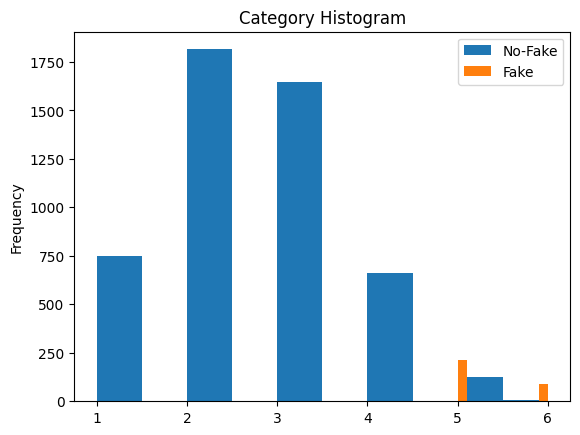

In [11]:
df_grouped_no_fake.count_category.plot.hist()
df_grouped_fake.count_category.plot.hist()
plt.title("Category Histogram")
plt.legend(["No-Fake", "Fake"])

<div class="alert alert-block alert-info">
    <b>NOTE:</b>
    <p>
        We can observe that <b>Fake users</b> tend to interact with more categories compared to <b>no-Fake users</b>. In general, Fake users interact with at least <b>5 categories</b>.
    </p>
</div>

We will observe if we can separe both type of users using only 2 featues: count of events and number of unique categories the user interacts with.

In [12]:
df_grouped = df.groupby(["UserId", "Fake"]).agg(count_event=("Event", "count"), count_category=("Category", "nunique"))

In [13]:
df_grouped = df_grouped.reset_index()

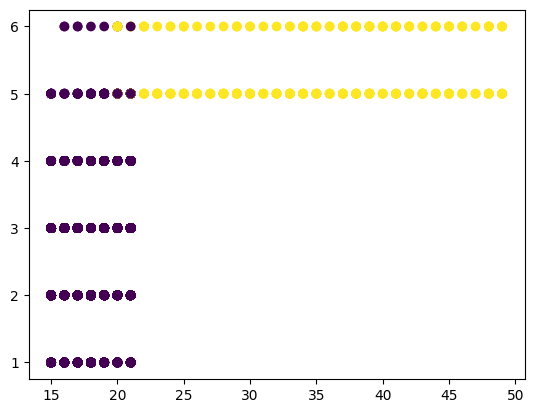

In [14]:
plt.scatter(df_grouped["count_event"], df_grouped["count_category"], c=df_grouped["Fake"])

In [15]:
df_grouped[df_grouped.count_event <= 21]["Fake"].value_counts()
df_grouped[df_grouped.count_event > 21]["Fake"].value_counts()

0    5000
1      18
Name: Fake, dtype: int64

1    282
Name: Fake, dtype: int64

<div class="alert alert-block alert-info">
    <b>NOTE:</b>
    <p>
        We can observe that <b>Fake users</b> and <b>No-Fake users</b> can be separated using just 2 fetures. Let's do to build a model using these features !!!
    </p>
</div>